# Preprocessing for Evaluation
To evaluate the trust mining method, we use several bpmn diagrams, mesaure their features, mining time and metrics and compare them

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

This is the first dataset from BPMN 6219 and from the Unicam set. See here: https://ieee-dataport.org/documents/6219-pairs-bpmn-images-and-definition-files

In [543]:
bpmn_6219 = pd.read_csv("../evaluation_bpmn6219.csv")

In [544]:
bpmn_81 = pd.read_csv("../evaluation_bpmn81.csv")

In [545]:
bpmn_6219_81 = bpmn_6219.append(bpmn_81)

In [546]:
len(bpmn_6219_81)

6300

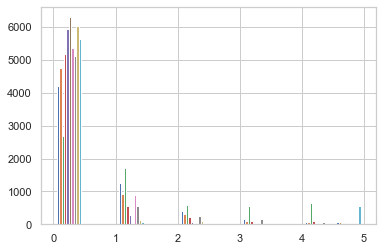

In [547]:
plt.hist(bpmn_6219_81[['endEventRequiredErrors',
                       'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                       'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                       'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                       'noInclusiveGatewayErrors', 'conditionalFlowErrors']], range=(0,5))
plt.show()

In [548]:
bpmn_6219_81[['endEventRequiredErrors',
                       'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                       'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                       'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                       'noInclusiveGatewayErrors', 'conditionalFlowErrors']].sum()

endEventRequiredErrors             4352
startEventRequiredErrors           3188
fakeJoinErrors                     8179
noDisconnectedErrors               3342
superfluousGatewayErrors            507
subProcessBlankStartEventErrors       7
noGatewayJoinForkErrors            1047
noImplicitSplitErrors              2848
noInclusiveGatewayErrors            473
conditionalFlowErrors              2956
dtype: int64

In [549]:
acceptable_bpmn_6219_81_df = bpmn_6219_81[(bpmn_6219_81['endEventRequiredErrors'] == 0) & 
                                          (bpmn_6219_81['startEventRequiredErrors'] == 0) &
                                          (bpmn_6219_81['noDisconnectedErrors'] == 0) &
                                          #(bpmn_6219_81['superfluousGatewayErrors'] == 0) &
                                          (bpmn_6219_81['subProcessBlankStartEventErrors'] == 0) &
                                          (bpmn_6219_81['noGatewayJoinForkErrors'] == 0) &
                                          (bpmn_6219_81['noImplicitSplitErrors'] == 0) &
                                          (bpmn_6219_81['noInclusiveGatewayErrors'] == 0) &
                                          (bpmn_6219_81['conditionalFlowErrors'] == 0) #&
                                          #(bpmn_6219_81['fakeJoinErrors'] == 0)
                                         ]

In [550]:
usable_bpmn_6219_81_df = acceptable_bpmn_6219_81_df[acceptable_bpmn_6219_81_df["modelNP"]>1]
len(usable_bpmn_6219_81_df)

852

In [551]:
unique_bpmn_6219_81_df = usable_bpmn_6219_81_df.drop_duplicates(subset=['modelIsValidBPMN', 'modelTNT', 'modelTNCS', 'modelTNA', 
                                                             'modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                             'modelTNE', 'modelTNSF', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                             'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT', 'tapeGU',
                                                             'tapeLUB', 'tapeAvgLUB',
                                                             'tapeAvgDI', 'tapeAvgDD', 'tapeAvgMI', 'tapeAvgMD',
                                                             'applicationDomain', 'endEventRequiredErrors',
                                                             'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                                                             'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                                                             'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                                                             'noInclusiveGatewayErrors', 'conditionalFlowErrors'], keep='first')
len(unique_bpmn_6219_81_df)

137

In [552]:
application_groups = unique_bpmn_6219_81_df.groupby('applicationDomain').count()
application_groups.sort_values('fileName')

,fileName,modelIsValidBPMN,modelTNT,modelTNCS,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,modelTNE,modelTNSF,modelNP,modelNL,modelCLA,modelCLP,modelPDOPin,modelPDOPout,modelPDOTOut,modelPLT,tapeGU,tapeALU,tapeRLU,tapeLUB,tapeAvgLUB,tapeDI,tapeDD,tapeAvgDI,tapeAvgDD,tapeMI,tapeMD,tapeAvgMI,tapeAvgMD,tapeExecutionTimeMs,endEventRequiredErrors,startEventRequiredErrors,fakeJoinErrors,noDisconnectedErrors,superfluousGatewayErrors,subProcessBlankStartEventErrors,noGatewayJoinForkErrors,noImplicitSplitErrors,noInclusiveGatewayErrors,conditionalFlowErrors
applicationDomain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Manufacturing,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Politics,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Academics,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Digital Platforms,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Identity Verification,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3,2,2,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3
Mobility,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
E-Commerce,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,2,4,2,2,4,4,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4
HR,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,4,3,3,4,4,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4
IoT,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


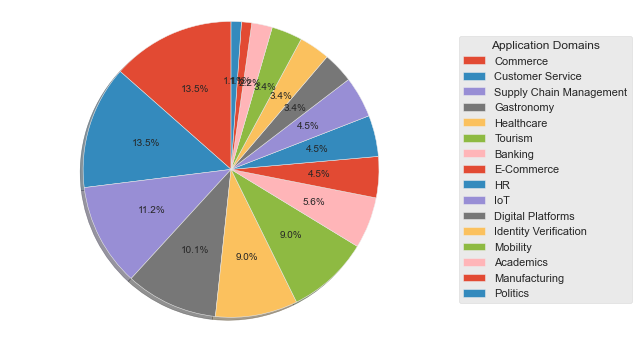

In [576]:
plt.style.use('ggplot')

application_groups = unique_bpmn_6219_81_df.groupby('applicationDomain').count().sort_values('fileName', ascending=False)

labels = application_groups.index
sizes = application_groups['fileName']

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(wedges, labels,
          title="Application Domains",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.figure.set_size_inches(8, 6)
plt.savefig("../plots/pie_application_domains.pdf")
plt.show()

In [480]:
#valid_bpmn_6219_81_df = bpmn_6219_81[bpmn_6219_81["modelIsValidBPMN"]]
#len(valid_bpmn_6219_81_df)

In [481]:
unique_bpmn_6219_81_df.head()

,fileName,modelIsValidBPMN,applicationDomain,modelTNT,modelTNCS,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,modelTNE,modelTNSF,modelNP,modelNL,modelCLA,modelCLP,modelPDOPin,modelPDOPout,modelPDOTOut,modelPLT,tapeGU,tapeALU,tapeRLU,tapeLUB,tapeAvgLUB,tapeDI,tapeDD,tapeAvgDI,tapeAvgDD,tapeMI,tapeMD,tapeAvgMI,tapeAvgMD,tapeExecutionTimeMs,endEventRequiredErrors,startEventRequiredErrors,fakeJoinErrors,noDisconnectedErrors,superfluousGatewayErrors,subProcessBlankStartEventErrors,noGatewayJoinForkErrors,noImplicitSplitErrors,noInclusiveGatewayErrors,conditionalFlowErrors
5,00005.bpmn,True,Customer Service,15,0,15,0,4,3,1,1,3,27,3,5,0.555556,1.000000,0.0,0.0,0.0,0.333333,211,70.333333,"0.6113744075829384,0.25118483412322273,0.13744...","0.27804107424960506,-0.08214849921011058,-0.19...",9.251859e-18,"0,0,0","0,0,0",0,0,"2,1,0","1,1,1",1.000000,1.000000,46.121494,0,0,3,0,0,0,0,0,0,0
13,00013.bpmn,True,Tourism,11,0,11,0,2,2,3,3,2,20,2,0,0.550000,4.000000,0.0,0.0,0.0,0.000000,0,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,0,0,NaN,NaN,0.000000,0.000000,22.819357,0,0,2,0,0,0,0,0,0,0
14,00014.bpmn,True,Tourism,11,0,11,0,2,3,4,4,2,21,2,0,0.523810,3.000000,0.0,0.0,0.0,0.000000,163,81.500000,"0.4049079754601227,0.5950920245398773","-0.0950920245398773,0.0950920245398773",0.000000e+00,"0,0","0,0",0,0,"1,1","1,1",1.000000,1.000000,35.124959,0,0,1,0,0,0,0,0,0,0
18,00018.bpmn,True,NaN,15,0,15,0,4,3,1,1,3,27,3,5,0.555556,1.000000,0.0,0.0,0.0,0.333333,211,70.333333,"0.6113744075829384,0.25118483412322273,0.13744...","0.27804107424960506,-0.08214849921011058,-0.19...",9.251859e-18,"0,0,0","0,0,0",0,0,"2,1,0","1,1,1",1.000000,1.000000,30.960546,0,0,3,0,0,0,0,0,0,0
79,00079.bpmn,False,E-Commerce,12,0,12,1,9,5,7,7,4,37,3,3,0.324324,2.333333,0.0,0.0,0.0,0.250000,260,86.666667,"0.5307692307692308,0.3730769230769231,0.096153...","0.19743589743589746,0.03974358974358977,-0.237...",1.850372e-17,"0,0,0","0,0,0",0,0,"2,1,1","2,1,1",1.333333,1.333333,42.456582,0,0,0,0,0,0,0,0,0,0


In [382]:
usable_bpmn_6219_81_df["modelNP"].unique()

array([ 3,  2,  4,  5, 11,  9,  7,  6, 13,  8, 12, 14, 10])

<AxesSubplot:>

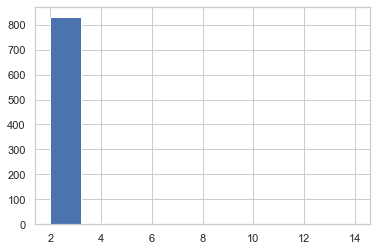

In [384]:
usable_bpmn_6219_81_df["modelNP"].hist()

## Characteristics
To get an overview over the raw dataset, we use violin plots to show the distribution of certain characteristics in the models and compare them later to the Metrics introduced with Trust Mining.

The violin plots use a *kernel density estimator* with a width of 8 to smoothen the unequally distributed features.

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

In [444]:
static_characteristics = unique_bpmn_6219_81_df[['modelTNT', 'modelTNCS', 'modelTNA',
                                                'modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelTNSF', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT', 'tapeGU',
                                                'tapeALU', 'tapeRLU', 'tapeLUB', 'tapeAvgLUB',
                                                'tapeAvgDI', 'tapeAvgDD', 'tapeAvgMI', 'tapeAvgMD',
                                                'tapeExecutionTimeMs', 'applicationDomain', 'endEventRequiredErrors',
                                                'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                                                'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                                                'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                                                'noInclusiveGatewayErrors', 'conditionalFlowErrors']]

In [445]:
raw_model_characteristics_with_activities = unique_bpmn_6219_81_df[['modelTNA','modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP']]
raw_model_characteristics_with_activities.describe().round(2)

,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,modelTNE,modelNP,modelNL,modelCLA,modelCLP
count,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00
mean,11.18,0.95,2.74,3.89,1.05,1.05,3.29,3.15,1.50,0.59,1.35
std,6.18,2.22,4.14,2.78,2.18,2.18,2.52,2.49,1.88,0.14,1.14
min,3.00,0.00,0.00,1.00,0.00,0.00,1.00,2.00,0.00,0.30,0.00
25%,7.00,0.00,0.00,2.00,0.00,0.00,2.00,2.00,0.00,0.50,0.50
50%,10.00,0.00,2.00,3.00,0.00,0.00,2.00,2.00,0.00,0.57,1.00
75%,14.00,1.00,4.00,4.00,1.00,1.00,3.00,3.00,3.00,0.68,2.00
max,46.00,13.00,38.00,14.00,17.00,17.00,14.00,14.00,7.00,1.00,4.50


In [574]:
raw_model_characteristics_with_activities.describe().round(2).to_csv('../raw_model_characteristics.csv')

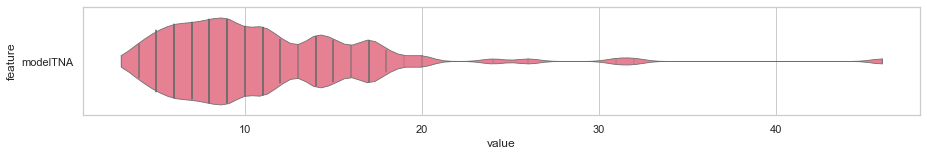

In [446]:
raw_model_characteristics_activities = unique_bpmn_6219_81_df[['modelTNA']]
raw_model_characteristics_activities_series_stacked = raw_model_characteristics_activities.stack()
raw_model_characteristics_activities_series_stacked.index = raw_model_characteristics_activities_series_stacked.index.droplevel(level=0)
raw_model_characteristics_activities_df = pd.DataFrame(raw_model_characteristics_activities_series_stacked).reset_index()
raw_model_characteristics_activities_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_characteristics_activities_df, scale="count", palette="husl", width=0.8, cut=0, inner="stick", bw=0.1, linewidth=0.8)
ax.figure.set_size_inches(15, len(raw_model_characteristics_activities_df["feature"].unique())*2)

In [447]:
raw_model_characteristics = unique_bpmn_6219_81_df[['modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP']]

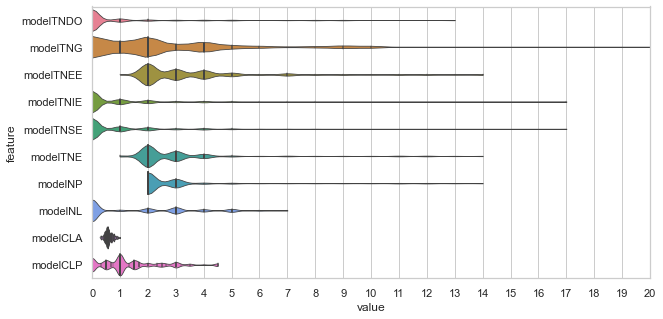

In [455]:
raw_model_characteristics_series_stacked = raw_model_characteristics.stack()
raw_model_characteristics_series_stacked.index = raw_model_characteristics_series_stacked.index.droplevel(level=0)
raw_model_df = pd.DataFrame(raw_model_characteristics_series_stacked).reset_index()
raw_model_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_df, scale="count", palette="husl", width=0.8, cut=0, inner="stick", bw=0.1, linewidth=0.8)
ax.figure.set_size_inches(10, len(raw_model_df["feature"].unique())/2)
ax.set_xlim(0,20)
ax.set_xticks(np.arange(0,21))
plt.savefig("../plots/violin_raw_model_characteristics.pdf")

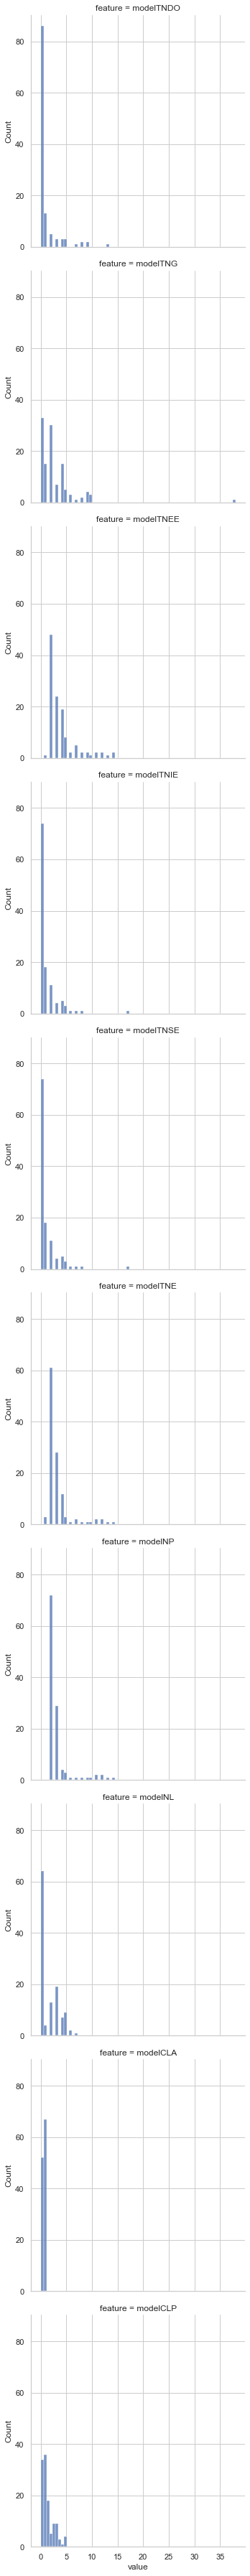

In [390]:
sns.displot(raw_model_df, x="value", row="feature")

<AxesSubplot:>

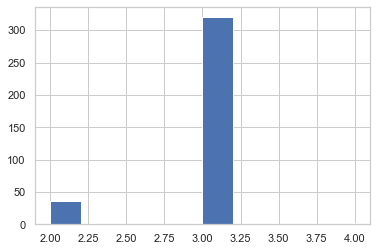

In [220]:
usable_bpmn_6219_81_df["modelNP"].hist()

In [558]:
import sys
!{sys.executable} -m pip install mpltools

     |████████████████████████████████| 829kB 4.0MB/s eta 0:00:01     |████████▊                       | 225kB 4.0MB/s eta 0:00:01
  Created wheel for mpltools: filename=mpltools-0.2.0-cp37-none-any.whl size=35687 sha256=71ae31414063957f5d1295b18b93285701740e9ac04ad38addef082f3fe35e1e
  Stored in directory: /Users/marcelmuller/Library/Caches/pip/wheels/0c/ee/93/dc1d50835c2eb347f3c9592b2e7226a61c18aec87703e493de
  Created wheel for configobj: filename=configobj-5.0.6-cp37-none-any.whl size=34547 sha256=1b84614401466aa4b42197cfc12c2dbf0bad6080d3e9bde31dfffd82b3cfcfce
  Stored in directory: /Users/marcelmuller/Library/Caches/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491057 sha256=6cc9d6931bb7fe15fc5afa8faaf34a213aff36244c231c1d2487ee07f9620dd1
  Stored in directory: /Users/marcelmuller/Library/Caches/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully buil